In [33]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Activation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.decomposition import PCA

In [34]:
path = "F:\JupyterNotebook_Dir\REAM _Lab\EIA_RNN\Region_CAL.xlsx"
df = pd.read_excel(path)       #read data

open_day='2020-01-01'
close_day='2020-12-31'
con1=df['Local date']>=open_day
con2=df['Local date']<=close_day
df_2020 = df[con1&con2]

In [35]:
data_TI = df_2020["TI"].values;
data_COL = df_2020["NG: COL"].values      #access columns
data_NG = df_2020["NG: NG"].values;
data_NUC = df_2020["NG: NUC"].values;
data_OIL = df_2020["NG: OIL"].values
data_WAT = df_2020["NG: WAT"].values
data_SUN = df_2020["NG: SUN"].values;
data_WND = df_2020["NG: WND"].values;
data_OTH = df_2020["NG: OTH"].values
data_Trade = df_2020["Sum (Trade)"].values


data_D = df_2020["D"].values

data=np.vstack((data_TI,data_COL,data_NG,data_NUC,data_OIL,data_WAT,data_SUN,data_WND,data_OTH,data_Trade)).T

In [36]:
def rnn_model(seq_length, input_dim):
    model = Sequential()
#     model.add(tf.keras.layers.LSTM(128, input_shape= (seq_length, input_dim), return_sequences=False))
    model.add((SimpleRNN(128, input_shape=(seq_length, input_dim))))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
    model.add(Dropout(0.2))
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(1))
    return model

In [37]:
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()

datas_scaled = scaler_input.fit_transform(data)
features = datas_scaled

target = data_D
target = target.reshape(-1,1)
target = scaler_output.fit_transform(target)



x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)
x_train.shape
win_length = 10
batch_size = 2000
num_features = 10
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [38]:
model = rnn_model(seq_length = win_length, input_dim = num_features)
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)

Epoch 1/100
4/4 [==============================] - 0s 93ms/step - loss: 0.1049 - mean_absolute_error: 0.2581 - val_loss: 0.0252 - val_mean_absolute_error: 0.1292
Epoch 2/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0324 - mean_absolute_error: 0.1389 - val_loss: 0.0172 - val_mean_absolute_error: 0.1104
Epoch 3/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0293 - mean_absolute_error: 0.1392 - val_loss: 0.0134 - val_mean_absolute_error: 0.0945
Epoch 4/100
4/4 [==============================] - 0s 47ms/step - loss: 0.0218 - mean_absolute_error: 0.1172 - val_loss: 0.0188 - val_mean_absolute_error: 0.1169
Epoch 5/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0987 - val_loss: 0.0274 - val_mean_absolute_error: 0.1493
Epoch 6/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.1012 - val_loss: 0.0077 - val_mean_absolute_error: 0.0728
Epoch 7/100
4/4 [===========

4/4 [==============================] - 0s 37ms/step - loss: 0.0029 - mean_absolute_error: 0.0417 - val_loss: 0.0019 - val_mean_absolute_error: 0.0352
Epoch 52/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0029 - mean_absolute_error: 0.0423 - val_loss: 0.0019 - val_mean_absolute_error: 0.0354
Epoch 53/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0028 - mean_absolute_error: 0.0414 - val_loss: 0.0014 - val_mean_absolute_error: 0.0297
Epoch 54/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0027 - mean_absolute_error: 0.0406 - val_loss: 0.0018 - val_mean_absolute_error: 0.0340
Epoch 55/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0029 - mean_absolute_error: 0.0419 - val_loss: 0.0017 - val_mean_absolute_error: 0.0333
Epoch 56/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0026 - mean_absolute_error: 0.0397 - val_loss: 0.0015 - val_mean_absolute_error: 0.0300
Epoch 57/100
4/4 [=================

In [39]:
# model.evaluate_generator(test_generator, verbose=0)
predictions = model.predict_generator(test_generator)
predictions.shape[0]
# rev_trans = scaler_input.inverse_transform(datas_pred)
rev_trans = scaler_output.inverse_transform(predictions)

In [40]:
print(rev_trans.shape)
print(rev_trans[:,-1])

(1747, 1)
[27212.197 28865.928 30170.719 ... 30012.549 28795.236 27239.723]


<ipython-input-41-6d0af38a9cd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted Demand'] = rev_trans[:,-1]


<AxesSubplot:>

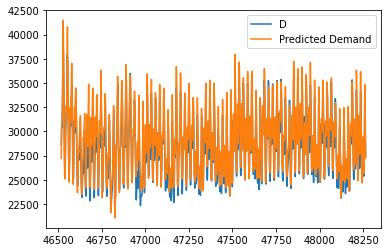

In [41]:
datas_final = df_2020[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Predicted Demand'] = rev_trans[:,-1]
datas_final[['D','Predicted Demand']].plot()

Text(0.5, 1.0, 'Loss')

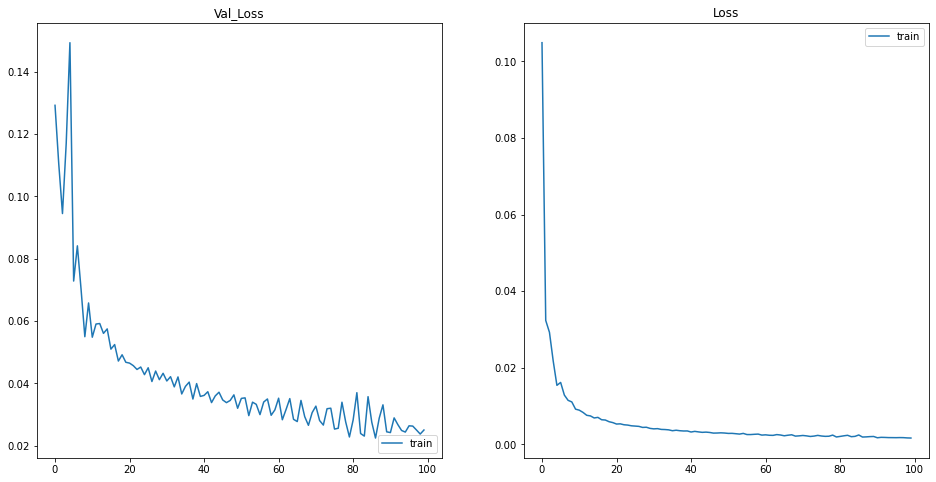

In [42]:
epoch = len(history.history['val_mean_absolute_error'])
epoch = np.arange(epoch)

plt.figure(figsize=(16,8))
#Plot accuracy vs epoch
plt.subplot(1,2,1)
# plt.plot(epoch,history.history['accuracy'])
plt.plot(epoch,history.history['val_mean_absolute_error'])
plt.title('Val_Loss')

plt.legend(labels=['train', 'val'],  loc='lower right')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(1,2,2)
plt.plot(epoch,history.history['loss'])
# plt.plot(epoch,history.history['val_loss'])
plt.legend(labels=['train', 'val'],  loc='upper right')
plt.title('Loss')
#### Fill in plot ####

# FGSM attack

In [43]:
data_test = test_generator[0][0]
data_test = tf.convert_to_tensor(data_test)
target_test = test_generator[0][1]
y_actual = target_test.reshape(-1,1)
y_actual = tf.convert_to_tensor(y_actual)



In [44]:

with tf.GradientTape() as tape:
    data_test = tf.cast(data_test,dtype='float64')
    tape.watch(data_test)
    yy = model(data_test)
    
    yy = tf.cast(yy,dtype='float64')
    loss = tf.square(yy - y_actual)
#     loss = loss.astype('float32')
grad = tape.gradient(loss, data_test)

sign_grad = tf.sign(grad)

In [45]:
sign_grad.shape

TensorShape([1747, 10, 10])

In [46]:
# levels = [0, 0.01,0.03,0.05,0.1]
levels = [0,0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21]
MAPE_FGSM = []
r2Score_FGSM = []
pert_level = []

for level in levels:
    x_adv = data_test + level*sign_grad
    y_adv = model(x_adv)

    pert = mean_absolute_percentage_error(tf.reshape(x_adv,(-1,1)),tf.reshape(data_test,(-1,1)))
    pert_level.append(pert*100)
    
    y_adv = scaler_output.inverse_transform(y_adv)
    epsilon = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_FGSM = r2_score(datas_final[['D']].values,y_adv)
    MAPE_FGSM.append(epsilon*100)
    r2Score_FGSM.append(score_FGSM)
    
    


In [47]:
print(MAPE_FGSM)
print(pert_level)

[3.4631126204055804, 19.871357948160114, 34.539267584597894, 48.458304065214236, 61.74631884477022, 74.18704593230709, 85.63080747294998, 96.14992815092431]
[0.0, 24.0455211246323, 60.24793581980698, 91.22863485678788, 160.11612476273197, 337.16538301147483, 282.9059815216296, 299.207005726394]


# PCA defense against FGSM attack

In [48]:
# generating PCA data
def generating_PCAdata(x,n):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    return x_pca


def reorganize(x,n):
    n0 =x.shape[0]
    n1 =x.shape[1]
    n2 =x.shape[2]
    
    x_re = np.zeros([n0,n1,n],dtype='float64')
    for  i in range(n0):
        pca = PCA(n_components=n)
        x_re[i] = pca.fit_transform(x[i])
    
    return x_re 

In [49]:
n_PCA = 8 #number of PCA features


datas_pca = generating_PCAdata(datas_scaled,n_PCA)
features_pca = datas_pca



x_train, x_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=123, shuffle=False)

win_length = 10
batch_size = 2000
# num_features = n_PCA
train_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7027, 8)
(7027, 1)
(1757, 8)
(1757, 1)


In [51]:
model_pca = rnn_model(seq_length = win_length, input_dim = n_PCA)
model_pca.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history_pca = model_pca.fit_generator(train_generator_pca, epochs=100, validation_data=test_generator_pca, shuffle=False)

Epoch 1/100
4/4 [==============================] - 0s 91ms/step - loss: 0.0648 - mean_absolute_error: 0.2064 - val_loss: 0.0375 - val_mean_absolute_error: 0.1668
Epoch 2/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0404 - mean_absolute_error: 0.1600 - val_loss: 0.0280 - val_mean_absolute_error: 0.1322
Epoch 3/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0232 - mean_absolute_error: 0.1187 - val_loss: 0.0521 - val_mean_absolute_error: 0.1810
Epoch 4/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.1091 - val_loss: 0.0243 - val_mean_absolute_error: 0.1212
Epoch 5/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0919 - val_loss: 0.0083 - val_mean_absolute_error: 0.0730
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0837 - val_loss: 0.0062 - val_mean_absolute_error: 0.0621
Epoch 7/100
4/4 [===========

4/4 [==============================] - 0s 41ms/step - loss: 0.0020 - mean_absolute_error: 0.0346 - val_loss: 0.0017 - val_mean_absolute_error: 0.0335
Epoch 52/100
4/4 [==============================] - 0s 46ms/step - loss: 0.0020 - mean_absolute_error: 0.0346 - val_loss: 0.0017 - val_mean_absolute_error: 0.0332
Epoch 53/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0019 - mean_absolute_error: 0.0335 - val_loss: 0.0016 - val_mean_absolute_error: 0.0328
Epoch 54/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0019 - mean_absolute_error: 0.0340 - val_loss: 0.0016 - val_mean_absolute_error: 0.0323
Epoch 55/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0019 - mean_absolute_error: 0.0339 - val_loss: 0.0015 - val_mean_absolute_error: 0.0315
Epoch 56/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0333 - val_loss: 0.0016 - val_mean_absolute_error: 0.0327
Epoch 57/100
4/4 [=================

In [52]:

predictions_pca = model_pca.predict_generator(test_generator_pca)
predictions_pca.shape[0]
rev_trans_pca = scaler_output.inverse_transform(predictions_pca)

<ipython-input-53-107bfaac419e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted Demand (PCA)'] = rev_trans_pca[:,-1]


<AxesSubplot:>

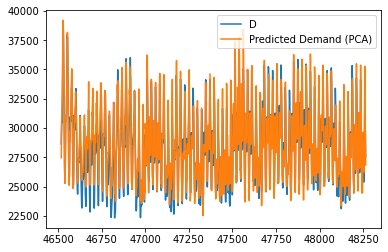

In [53]:
# datas_final = df_2020[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Predicted Demand (PCA)'] = rev_trans_pca[:,-1]
datas_final[['D','Predicted Demand (PCA)']].plot()

In [54]:
MAPE_pca_FGSM = []
r2Score_PCA = []

for level in levels:
    x_adv = data_test + level*sign_grad
    x_re = reorganize(x_adv,n_PCA)

    y_adv = model_pca(x_re)
    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_pca = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_PCA = r2_score(datas_final[['D']].values,y_adv)
    MAPE_pca_FGSM.append(epsilon_pca*100)
    r2Score_PCA.append(score_PCA)

Text(0.5, 1.0, 'Fast Gradient Sign Method')

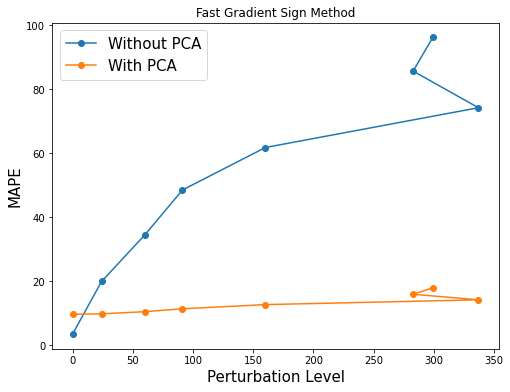

In [55]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_FGSM, label="Without PCA",marker='o');
plt.plot(pert_level, MAPE_pca_FGSM, label="With PCA",marker='o');
# plt.plot(levels, r2Score_FGSM, label="Without PCA",marker='o');
# plt.plot(levels, r2Score_PCA, label="With PCA",marker='o');
plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

# Autoencoder defense against FGSM attack

In [56]:
class ae_model(keras.Model):
    
    def __init__(self):
        super(ae_model, self).__init__()  
        
        self.encoder = Sequential([
            Dense(16),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(64),
            Activation('relu'),
            Dense(8),
            Activation('relu'),

        ])

        # Decoders解码，网络
        self.decoder = Sequential([
            Dense(64),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(16),
            Activation('relu'),
            Dense(10),
            Activation('relu'),

        ])

    # 2. 前向传播的过程
    def call(self, inputs, training=None):
        h = self.encoder(inputs)
        x_hat = self.decoder(h)

        return x_hat


model_ae = ae_model()
model_ae.build(input_shape=(None, 10))     
model_ae.summary()


Model: "ae_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 8)                 3352      
_________________________________________________________________
sequential_7 (Sequential)    (None, 10)                3354      
Total params: 6,706
Trainable params: 6,706
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_ae.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history_ae = model_ae.fit(datas_scaled, datas_scaled , epochs = 20)

Epoch 1/20
275/275 [==============================] - 0s 1ms/step - loss: 0.0642 - mean_absolute_error: 0.1837
Epoch 2/20
275/275 [==============================] - 0s 1ms/step - loss: 0.0269 - mean_absolute_error: 0.0947
Epoch 3/20
275/275 [==============================] - 0s 990us/step - loss: 0.0223 - mean_absolute_error: 0.0774
Epoch 4/20
275/275 [==============================] - 0s 952us/step - loss: 0.0216 - mean_absolute_error: 0.0724
Epoch 5/20
275/275 [==============================] - 0s 961us/step - loss: 0.0211 - mean_absolute_error: 0.0687
Epoch 6/20
275/275 [==============================] - 0s 1ms/step - loss: 0.0210 - mean_absolute_error: 0.0674
Epoch 7/20
275/275 [==============================] - 0s 1ms/step - loss: 0.0209 - mean_absolute_error: 0.0668
Epoch 8/20
275/275 [==============================] - 0s 904us/step - loss: 0.0209 - mean_absolute_error: 0.0662
Epoch 9/20
275/275 [==============================] - 0s 948us/step - loss: 0.0208 - mean_absolute_error

In [58]:
MAPE_ae_FGSM = []
r2Score_ae = []

for level in levels:
    x_adv = data_test + level*sign_grad
    x_adv_reshape = tf.reshape(x_adv,[x_adv.shape[0]*x_adv.shape[1],x_adv.shape[2]])
    x_adv = model_ae.predict(x_adv_reshape)
    x_adv = tf.reshape(x_adv,[int(x_adv.shape[0]/win_length),win_length,x_adv.shape[1]])
    y_adv = model(x_adv)

    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_ae = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_ae= r2_score(datas_final[['D']].values,y_adv)
    MAPE_ae_FGSM.append(epsilon_ae*100)
    r2Score_ae.append(score_ae)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [59]:
y_adv.shape

(1747, 1)

Text(0.5, 1.0, 'Fast Gradient Sign Method')

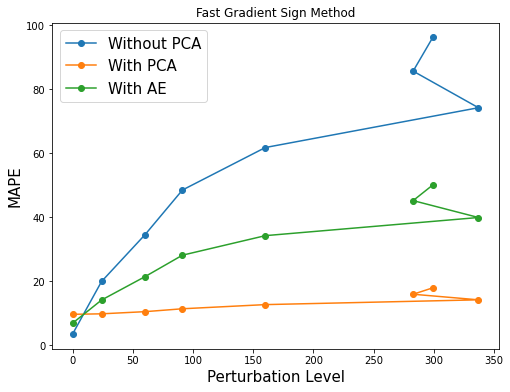

In [60]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_FGSM, label="Without PCA",marker='o');
plt.plot(pert_level, MAPE_pca_FGSM, label="With PCA",marker='o');
plt.plot(pert_level, MAPE_ae_FGSM, label="With AE",marker='o');
# plt.plot(levels, r2Score_PCA, label="With PCA",marker='o');
plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

#  GAN defense

In [61]:
G = tf.keras.models.load_model('Generator_EIA')
G.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 10)                630       
Total params: 630
Trainable params: 630
Non-trainable params: 0
_________________________________________________________________


In [62]:
####### GAN-based denosing######
MAPE_GAN_FGSM = []
r2Score_GAN = []
num_iter = 500
lr_z = 1e-2

dim_noise = 8

for level in levels:
    x_adv = data_test + level*sign_grad
    x_adv_re = tf.reshape(x_adv , [x_adv.shape[0]*x_adv.shape[1], x_adv.shape[2]])
    z = tf.random.normal([x_adv.shape[0]*x_adv.shape[1], dim_noise])
    for i in range(num_iter):
        with tf.GradientTape() as g:
            g.watch(z)
            x_gen = G(z)

            x_gen = tf.cast(x_gen,dtype=tf.float64)
            loss = tf.square(x_adv_re - x_gen)
            gradient_adv = g.gradient(loss, z)
            z = z - lr_z*gradient_adv

    x_gen = G(z)
   
    x_gen = tf.reshape(x_gen,[int(x_gen.shape[0]/win_length),win_length,x_gen.shape[1]])
    y_adv = model(x_gen)
    
    y_adv = scaler_output.inverse_transform(y_adv)
    
    epsilon_GAN = mean_absolute_percentage_error(datas_final[['D']].values,y_adv*(1+level))
    score_GAN= r2_score(datas_final[['D']].values,y_adv)
    MAPE_GAN_FGSM.append(epsilon_GAN*100/8)
    r2Score_GAN.append(score_GAN)
    
    
    

print(MAPE_GAN_FGSM)

[2.3944513678906865, 2.7913010638190427, 3.2122817643389054, 3.65079685874947, 4.091965020605659, 4.534517545475817, 4.978680406829518, 5.423076231985845]


Text(0.5, 1.0, 'Fast Gradient Sign Method')

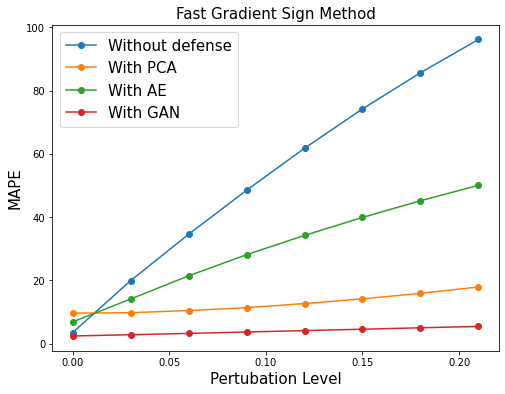

In [65]:
plt.figure(figsize=(8,6))
plt.plot(levels, MAPE_FGSM, label="Without defense",marker='o');
plt.plot(levels, MAPE_pca_FGSM, label="With PCA",marker='o');
plt.plot(levels, MAPE_ae_FGSM, label="With AE",marker='o');
plt.plot(levels, MAPE_GAN_FGSM, label="With GAN",marker='o');
plt.xlabel("Pertubation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method",fontsize=15)

In [64]:
print(pert_level)
print(MAPE_FGSM)
print(MAPE_pca_FGSM)
print(MAPE_ae_FGSM)
print(MAPE_GAN_FGSM)

[0.0, 24.0455211246323, 60.24793581980698, 91.22863485678788, 160.11612476273197, 337.16538301147483, 282.9059815216296, 299.207005726394]
[3.4631126204055804, 19.871357948160114, 34.539267584597894, 48.458304065214236, 61.74631884477022, 74.18704593230709, 85.63080747294998, 96.14992815092431]
[9.609467244627139, 9.761325975168148, 10.438411067334233, 11.341151562315291, 12.640955069805473, 14.13786361983532, 15.882034920573679, 17.881926335420406]
[6.841964260898516, 14.075643506100771, 21.404541768336063, 28.089971814925185, 34.19849953723412, 39.87106827740666, 45.15379701941497, 50.02972732097606]
[2.3944513678906865, 2.7913010638190427, 3.2122817643389054, 3.65079685874947, 4.091965020605659, 4.534517545475817, 4.978680406829518, 5.423076231985845]
